In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family = 'Gulim')
mpl.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [2]:
a1 = pd.read_csv("submission/69.ABC(DEFG)_BCDE(AFG)_regression.csv")
a2 = pd.read_csv("submission/81_1.ABC(DEFG)_BCDE(AFG)_regression_LGBM.csv")
a3 = pd.read_csv("submission/81_2.ABC(DEFG)_BCDE(AFG)_regression_rf.csv")
a4 = pd.read_csv("submission/81_3.ABC(DEFG)_BCDE(AFG)_regression_dt.csv")
a5 = pd.read_csv("submission/81_4.ABC(DEFG)_BCDE(AFG)_regression_cat.csv")
sub = pd.read_csv("data/sample_submission.csv")

In [3]:
a = a1.copy()
a.columns = ["ID", 69]
a["81_1"] = a2["대출등급"]
a["81_2"] = a3["대출등급"]
a["81_3"] = a4["대출등급"]
a["81_4"] = a5["대출등급"]
a["ans"] = 0
a = a.drop("ID", axis = 1)
a

,69,81_1,81_2,81_3,81_4,ans
0,B,B,B,B,B,0
1,B,B,B,B,B,0
2,A,A,A,A,A,0
3,C,C,C,C,C,0
4,C,C,C,C,C,0
...,...,...,...,...,...,...
64192,D,D,D,D,D,0
64193,D,D,D,D,D,0
64194,D,D,D,D,D,0
64195,C,C,C,C,C,0


In [4]:
def highest_freq_alphabet(row):
    alphabet_counts = row.value_counts()  # Count the frequency of each alphabet
    most_common_alphabet = alphabet_counts.idxmax()  # Get the alphabet with the highest frequency
    return most_common_alphabet
a['ans'] = a.apply(highest_freq_alphabet, axis=1)

In [5]:
mapping_target = {"A" : 0, "B" : 1, "C" : 2, "D" : 3, "E" : 4, "F" : 5, "G" : 6}
a['ans'] = a['ans'].replace(mapping_target)

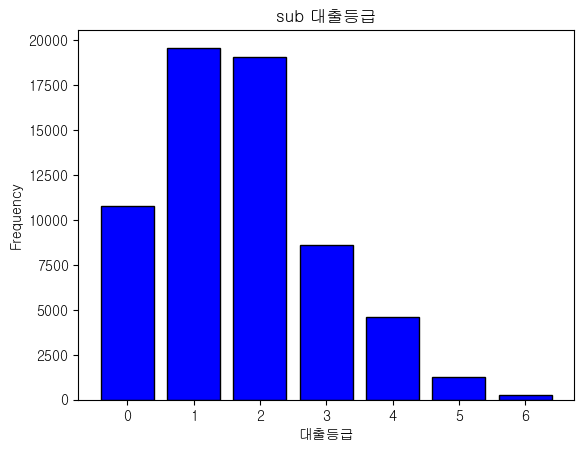

In [6]:
sub["대출등급"] = a["ans"]

plt.hist(sub["대출등급"], bins=range(8), align='left', rwidth=0.8, color='blue', edgecolor='black')

plt.xlabel("대출등급")
plt.ylabel("Frequency")
plt.title("sub 대출등급")
plt.show()

In [7]:
mapping_rank = {0 : "A",1 : "B",2 : "C",3 : "D",4 : "E",5 : "F",6 : "G"}
sub["대출등급"] = sub["대출등급"].replace(mapping_rank)
sub

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C
...,...,...
64192,TEST_64192,D
64193,TEST_64193,D
64194,TEST_64194,D
64195,TEST_64195,C


In [8]:
sub.to_csv("submission/82.regression_voting_ABC(DEFG)_BCDE(AFG)_hard.csv",index=False)